In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  


In [2]:
df=pd.read_csv('AQI_delhi.csv')
df.isnull().sum()
df.dropna(inplace=True)
df.drop(columns=['month'], inplace=True)
df.head()


C:\Users\sameer\AppData\Local\Temp\ipykernel_25148\271522121.py:1: DtypeWarning: Columns (0,3,4,5,6,7,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('AQI_delhi.csv')


,date,year,Month_name,day_of_week,season,city,station,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi,aqi_category
0,01-01-2020,2020.0,January,Wednesday,winter,Delhi,"Anand Vihar, Delhi",371.8,739.4,119.6,47.7,5.19,12.3,9.4,100.0,3.6,1.2,500.0,Severe
1,01-01-2020,2020.0,January,Wednesday,winter,Delhi,"Anand Vihar, Delhi",301.1,588.8,117.9,39.3,4.32,15.8,20.6,50.0,5.9,1.4,500.0,Severe
2,01-01-2020,2020.0,January,Wednesday,winter,Delhi,"Anand Vihar, Delhi",334.0,602.6,150.1,36.3,7.13,14.3,12.4,56.0,4.5,1.1,500.0,Severe
3,01-01-2020,2020.0,January,Wednesday,winter,Delhi,"Anand Vihar, Delhi",403.8,841.8,142.0,30.3,4.90,13.2,14.4,48.0,5.8,1.4,500.0,Severe
4,01-01-2020,2020.0,January,Wednesday,winter,Delhi,"Jahangirpuri, Delhi",433.2,784.7,138.4,41.5,7.56,15.4,6.8,100.0,2.8,0.4,500.0,Severe


In [25]:
print('========AQI Statistics========')
print(f'Average:{np.mean(df['aqi']):.2f}')
print(f'Median:{np.median(df["aqi"]):.2f}')
print(f'Highest:{np.max(df['aqi']):.2f}')
print(f'Lowest:{np.min(df['aqi']):.2f}')


#bad days
print(f'\n========BAD AIR QUALITY DAYS ========')
print(f'Good Days (AQI < 50):{np.sum(df['aqi']<=50)}')
print(f'Moderate Days (AQI 50-100): {np.sum((df['aqi']>50) & (df['aqi'] <=100))}')
print(f'Unhealty Days (AQI > 150):{np.sum(df['aqi']>150)}')

#percentage 
bad_percentage=np.mean(df['aqi']>150)*100
print(f'\n{bad_percentage:.2f}% of days had unhealthy air quality.')



========AQI Statistics========
Average:259.98
Median:233.00
Highest:500.00
Lowest:25.00

========BAD AIR QUALITY DAYS ========
Good Days (AQI < 50):5783
Moderate Days (AQI 50-100): 12865
Unhealty Days (AQI > 150):49156

61.84% of days had unhealthy air quality.



 DISTRIBUTION OF AQI IN DELHI


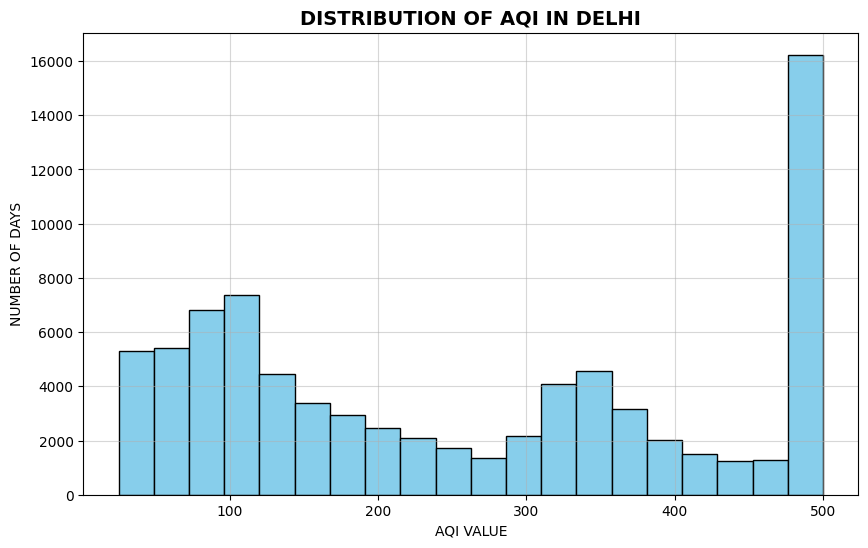

In [51]:
print("\n" + "="*70)
print(' DISTRIBUTION OF AQI IN DELHI')
print("="*70)
#histogram
plt.figure(figsize=(10,6))
plt.hist(df['aqi'],bins=20,color='skyblue',edgecolor='black')
plt.title('DISTRIBUTION OF AQI IN DELHI',fontsize=14,fontweight='bold')
plt.xlabel('AQI VALUE')
plt.ylabel('NUMBER OF DAYS')
plt.grid(alpha=0.5)

plt.show()


 WINTER VS SUMMER AQI DISTRIBUTION


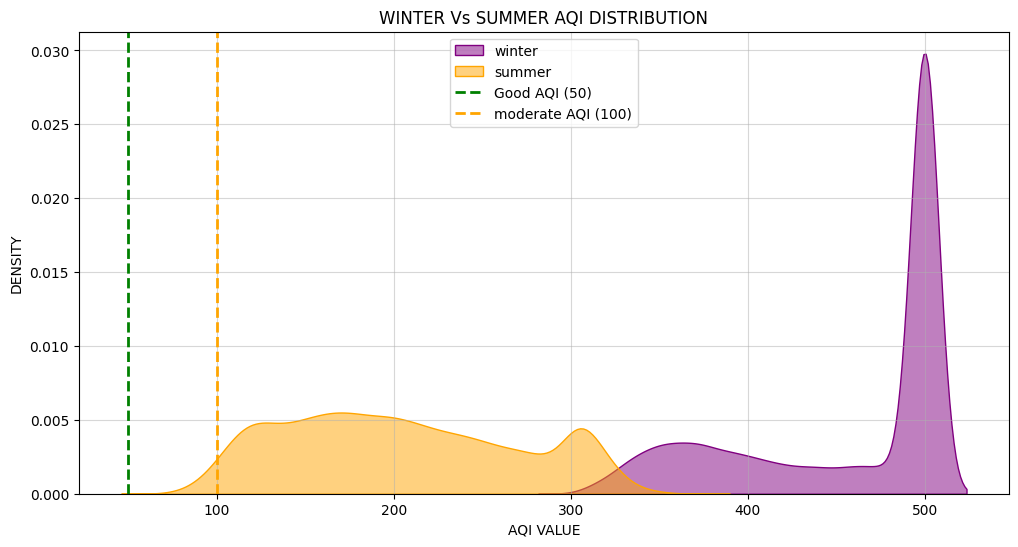

In [49]:
print("\n" + "="*70)
print(' WINTER VS SUMMER AQI DISTRIBUTION')
print("="*70)
# winter vs summer
plt.figure(figsize=(12,6))

summer=df[df['season'] == 'winter']['aqi']
winter=df[df['season'] == 'summer']['aqi']

sns.kdeplot(summer,fill=True,color='purple',label='winter',alpha=0.5)
sns.kdeplot(winter,fill=True,color='orange',label='summer',alpha=0.5)

plt.axvline(50,color='green',linestyle='--',linewidth=2,label='Good AQI (50)')
plt.axvline(100,color='orange',linestyle='--',linewidth=2,label='moderate AQI (100)')

plt.title('WINTER Vs SUMMER AQI DISTRIBUTION')
plt.xlabel('AQI VALUE')
plt.ylabel('DENSITY')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


 VISIBILITY ANALYSIS

Average visibility for each season:
season
monsoon         8.846086
post_monsoon    3.213451
summer          5.189850
winter          1.692063
Name: visibility, dtype: float64


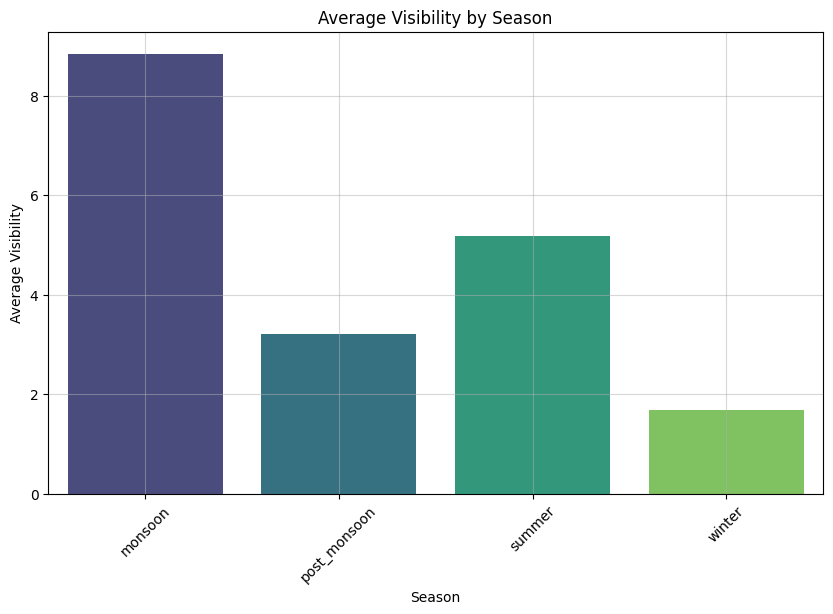

In [50]:
print("\n" + "="*70)
print(' VISIBILITY ANALYSIS')
print("="*70)
#visibility for each season
visibility_season=df.groupby('season')['visibility'].mean()

print('\nAverage visibility for each season:')
print(visibility_season)

plt.figure(figsize=(10,6))
sns.barplot(x=visibility_season.index,y=visibility_season.values,palette='viridis',hue=visibility_season.index)

plt.title("Average Visibility by Season")
plt.xlabel("Season")
plt.ylabel("Average Visibility")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()



 AQI VS TEMPRATURE


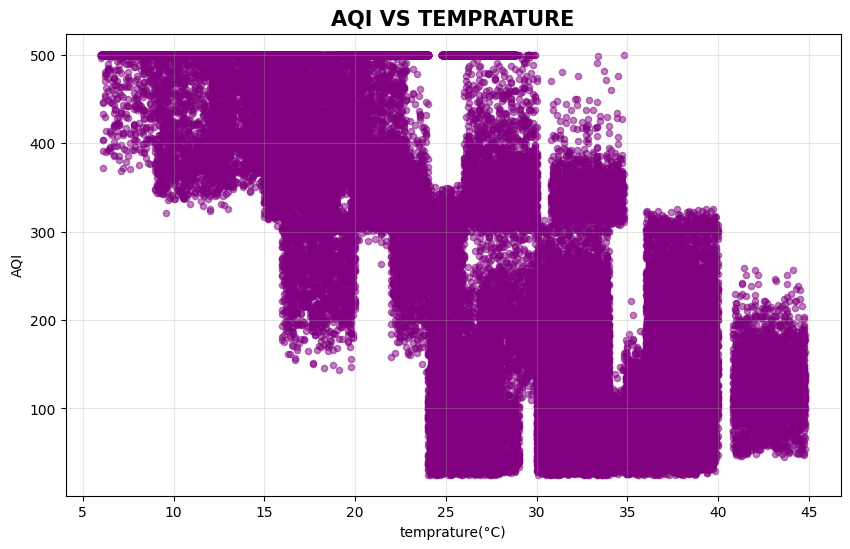

In [46]:
print("\n" + "="*70)
print(' AQI VS TEMPRATURE')
print("="*70)
#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['temperature'],df['aqi'],alpha=0.5,color='purple',s=20)
plt.title("AQI VS TEMPRATURE",fontsize=15,fontweight='bold')
plt.xlabel('temprature(°C)')   
plt.ylabel('AQI')
plt.grid(alpha=0.3)
plt.show()



 AQI DISTRIBUTION BY SEASON


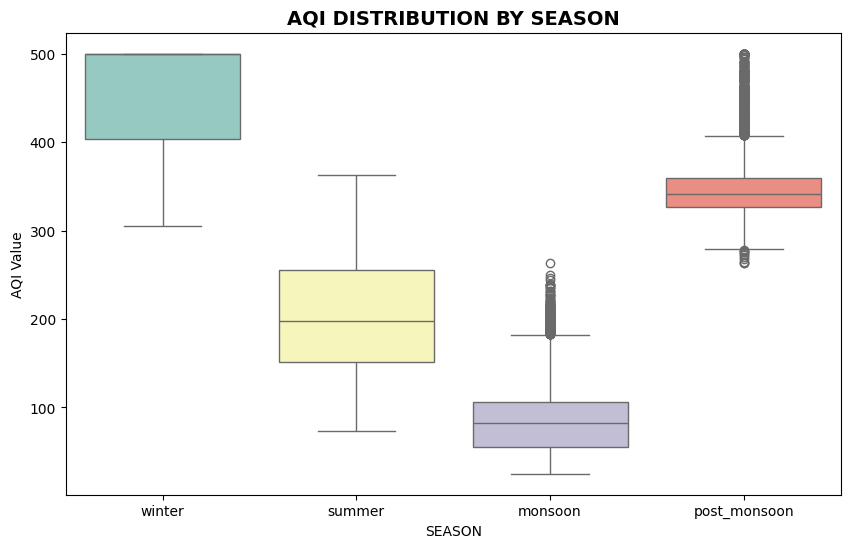

--------------AQI stats by season----------------
                count        mean        std    min    25%    50%    75%  \
season                                                                     
monsoon       26496.0   83.180367  34.823188   25.0   55.0   82.0  106.0   
post_monsoon   6624.0  348.543176  34.834744  263.0  327.0  341.0  359.0   
summer        19872.0  204.356985  65.023405   73.0  151.0  198.0  255.0   
winter        26496.0  456.368433  59.989558  305.0  403.0  500.0  500.0   

                max  
season               
monsoon       263.0  
post_monsoon  500.0  
summer        363.0  
winter        500.0  

worst season for air aquality: winter


In [44]:
print("\n" + "="*70)
print(' AQI DISTRIBUTION BY SEASON')
print("="*70)
#boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='season',y='aqi',data=df,hue='season',palette='Set3')
plt.title('AQI DISTRIBUTION BY SEASON',fontsize=14,fontweight='bold')
plt.xlabel('SEASON')
plt.ylabel('AQI Value')
plt.show()

#each season
print('--------------AQI stats by season----------------')
season_stats=df.groupby('season')['aqi'].describe()
print(season_stats)

#worst season
worst_season=df.groupby('season')['aqi'].mean().idxmax()
print(f'\nworst season for air aquality: {worst_season}')


 AQI CATEGORIES


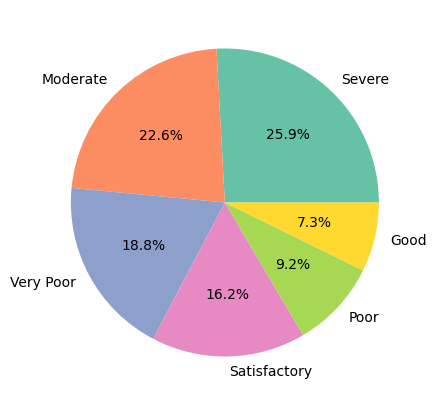

Number of days 
aqi_category
Severe          20560
Moderate        17982
Very Poor       14952
Satisfactory    12865
Poor             7346
Good             5783
Name: count, dtype: int64


In [45]:
print("\n" + "="*70)
print(' AQI CATEGORIES')
print("="*70)
# Visualize AQI distribution
category=df['aqi_category'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(category.values,labels=category.index,autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.show()

print('Number of days ')
print(category)


 AVERAGE POLLUTANT LEVELS


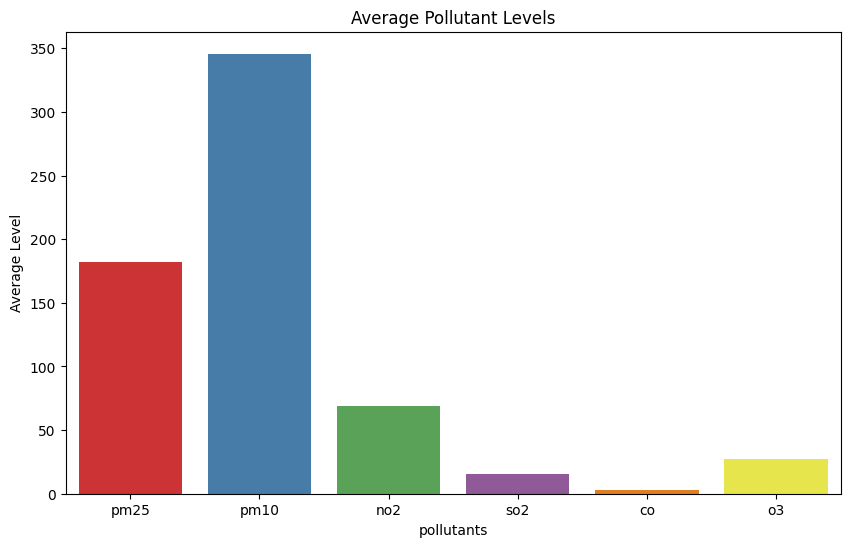


pollutant comparison with safe levels:
pm25:safe=12|actual=181.89
pm10:safe=54|actual=345.67
no2:safe=53|actual=69.16
so2:safe=35|actual=15.87
co:safe=4.4|actual=3.01
o3:safe=54|actual=27.40


In [43]:
print("\n" + "="*70)
print(' AVERAGE POLLUTANT LEVELS')
print("="*70)
#pollutants
pollutants=['pm25','pm10','no2','so2','co','o3']
avg_pollutants=df[pollutants].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_pollutants.index,y=avg_pollutants.values,palette='Set1',hue=pollutants)
plt.title("Average Pollutant Levels")
plt.xlabel('pollutants')
plt.ylabel('Average Level')
plt.show()

# safe levels
safe_levels = {
    'pm25': 12,
    'pm10': 54,
    'no2': 53,
    'so2': 35,
    'co': 4.4,
    'o3': 54
}
#actual averages
actual_averages={
    'pm25': df['pm25'].mean(),
    'pm10': df['pm10'].mean(),
    'no2': df['no2'].mean(),
    'so2': df['so2'].mean(),
    'co': df['co'].mean(),
    'o3': df['o3'].mean()

}
#compare
print("\npollutant comparison with safe levels:")
for pollutant in safe_levels:
    safe=safe_levels[pollutant]
    actual=actual_averages[pollutant]
    print(f'{pollutant}:safe={safe}|actual={actual:.2f}')




 MOST POLLUTED STATIONS


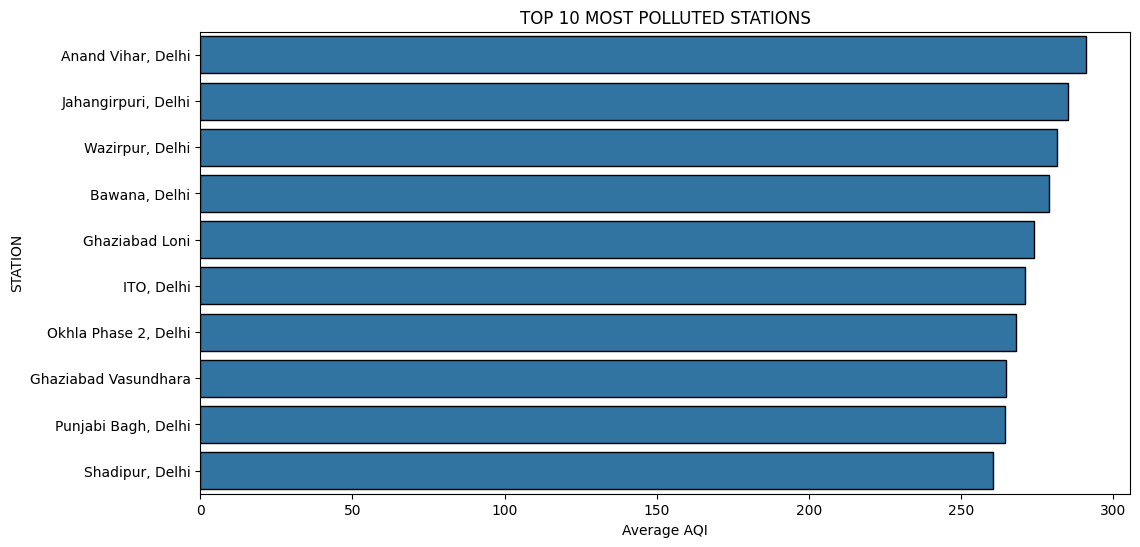

station
Anand Vihar, Delhi      291.039352
Jahangirpuri, Delhi     285.081308
Wazirpur, Delhi         281.420139
Bawana, Delhi           278.740741
Ghaziabad Loni          274.033565
ITO, Delhi              271.027778
Okhla Phase 2, Delhi    268.178530
Ghaziabad Vasundhara    264.598380
Punjabi Bagh, Delhi     264.440104
Shadipur, Delhi         260.508391
Name: aqi, dtype: float64


In [23]:
print("\n" + "="*70)
print(' MOST POLLUTED STATIONS')
print("="*70)
# STATIONS
station_aqi=df.groupby('station')['aqi'].mean().sort_values(ascending=False)

most_polluted_station=station_aqi.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=most_polluted_station,y=most_polluted_station.index,edgecolor='black')
plt.title('TOP 10 MOST POLLUTED STATIONS')
plt.xlabel('Average AQI')
plt.ylabel('STATION')
plt.show()

#MOST POLLUTED STATONS
print(most_polluted_station)